Calculando tabelas normativas para os intrumentos de Competências Emocionais e Impulsividade (e talvez uma coisa ou outra a mais)

In [1]:
# importando bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns


sns.set_theme(style="darkgrid")

# Importando base de dados

In [23]:
url_competencias_emocionais = "https://raw.githubusercontent.com/miggelucas/Impulsivity-Measure-Instrument/main/Base%20de%20dados/escores_competencias_emocionais.csv"
url_impulsividade = "https://raw.githubusercontent.com/miggelucas/Impulsivity-Measure-Instrument/main/Base%20de%20dados/escores_impulsividade.csv"
# criando base de dados unindo os escores dos dois instrumentos

path_instrumentos = [url_competencias_emocionais, url_impulsividade]

df_competencias_emocionais = pd.read_csv(url_competencias_emocionais)
df_impulsividade = pd.read_csv(url_impulsividade)

df_geral = pd.concat([df_competencias_emocionais, df_impulsividade], axis = 1)
df_geral.head()

,REO,RESBP,EE,PE,RESAP,CEG,falta_de_atencao,impulsividade,planejamento
0,2.625,3.000,2.75,4.000,3.333,3.138,2.714286,2.250000,3.6
1,2.625,2.714,3.00,2.714,3.333,2.793,3.285714,2.500000,2.5
2,5.000,4.429,2.25,5.000,3.000,4.276,4.857143,4.333333,4.1
3,4.000,3.857,4.75,4.857,4.000,4.276,2.857143,2.583333,2.8
4,3.000,3.143,2.00,4.143,3.333,3.207,3.857143,2.833333,3.2


# Tabela descritiva

In [30]:
tabela_descritiva = df_geral.describe()
tabela_descritiva

,REO,RESBP,EE,PE,RESAP,CEG,falta_de_atencao,impulsividade,planejamento
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,3.605072,3.176152,3.371075,4.097292,3.486319,3.575790,3.175983,2.623188,3.512923
std,0.846865,0.859082,1.009582,0.643439,0.904107,0.575373,0.934040,0.662336,0.670209
min,1.000000,1.000000,1.000000,1.429000,1.000000,1.448000,1.000000,1.000000,1.500000
25%,3.125000,2.571000,2.500000,3.714000,3.000000,3.207000,2.428571,2.166667,3.000000
50%,3.750000,3.143000,3.500000,4.143000,3.667000,3.569000,3.142857,2.583333,3.500000
75%,4.250000,3.857000,4.250000,4.571000,4.000000,3.966000,3.857143,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,4.931000,5.000000,4.916667,5.000000


In [48]:
escores_escalados = pd.DataFrame()
for coluna in df_geral.columns:
  # escore z calculado de forma manual
  # (escores do usuario - media para fator) / desvio padrao do fator
  escores_escalados[coluna] = (df_geral[coluna] - df_geral[coluna].mean()) / df_geral[coluna].std()


In [47]:
construtos = df_geral.columns

tabela_normativa = pd.DataFrame()

for constructo in construtos:
  # quantil do escore calculado para cada 0.05 percentil da amostra para cada coluna
  tabela_normativa[constructo] = df_geral[constructo].quantile([round(x * 0.05, 2) for x in range(21)])

  # quantil do escore Z calculado para cada 0.05 percentil da amostra para cada coluna
  tabela_normativa[constructo + "_z"] = escores_escalados[constructo].quantile([round(x * 0.05, 2) for x in range(21)])

tabela_normativa.index.rename("Percentil", inplace= True)
round(tabela_normativa, 3)

,REO,REO_z,RESBP,RESBP_z,EE,EE_z,PE,PE_z,RESAP,RESAP_z,CEG,CEG_z,falta_de_atencao,falta_de_atencao_z,impulsividade,impulsividade_z,planejamento,planejamento_z
Percentil,,,,,,,,,,,,,,,,,,
0.00,1.000,-3.076,1.000,-2.533,1.000,-2.349,1.429,-4.147,1.000,-2.750,1.448,-3.698,1.000,-2.330,1.000,-2.451,1.5,-3.003
0.05,2.000,-1.895,1.571,-1.868,1.750,-1.606,3.000,-1.705,1.667,-2.012,2.586,-1.720,1.714,-1.565,1.667,-1.444,2.4,-1.661
0.10,2.500,-1.305,2.000,-1.369,2.000,-1.358,3.143,-1.483,2.333,-1.276,2.852,-1.258,2.000,-1.259,1.833,-1.193,2.7,-1.213
0.15,2.750,-1.010,2.286,-1.036,2.250,-1.110,3.429,-1.039,2.350,-1.257,2.966,-1.060,2.143,-1.106,1.921,-1.060,2.8,-1.064
0.20,2.875,-0.862,2.429,-0.870,2.500,-0.863,3.571,-0.818,2.667,-0.906,3.103,-0.822,2.286,-0.953,2.083,-0.815,2.9,-0.915
0.25,3.125,-0.567,2.571,-0.704,2.500,-0.863,3.714,-0.596,3.000,-0.538,3.207,-0.641,2.429,-0.800,2.167,-0.689,3.0,-0.765
0.30,3.250,-0.419,2.714,-0.538,2.750,-0.615,3.857,-0.373,3.000,-0.538,3.310,-0.462,2.571,-0.647,2.250,-0.563,3.1,-0.616
0.35,3.375,-0.272,2.857,-0.372,3.000,-0.368,3.857,-0.373,3.333,-0.170,3.379,-0.342,2.714,-0.494,2.333,-0.438,3.3,-0.318
0.40,3.500,-0.124,3.000,-0.205,3.000,-0.368,4.000,-0.151,3.333,-0.170,3.448,-0.222,2.857,-0.341,2.417,-0.312,3.4,-0.168


# Plots

In [62]:
# acho que para visualizar os dados, diferenciar o sexo pode ser interessante

url_base_geral = "https://raw.githubusercontent.com/miggelucas/Impulsivity-Measure-Instrument/main/Base%20de%20dados/database.csv"
df_raw = pd.read_csv(url_base_geral).dropna().reset_index(drop= True)

df_analise = pd.concat([df_competencias_emocionais, df_impulsividade,df_raw["Gênero"] ], axis = 1)
df_analise


,REO,RESBP,EE,PE,RESAP,CEG,falta_de_atencao,impulsividade,planejamento,Gênero
0,2.625,3.000,2.75,4.000,3.333,3.138,2.714286,2.250000,3.6,Feminino
1,2.625,2.714,3.00,2.714,3.333,2.793,3.285714,2.500000,2.5,Feminino
2,5.000,4.429,2.25,5.000,3.000,4.276,4.857143,4.333333,4.1,Feminino
3,4.000,3.857,4.75,4.857,4.000,4.276,2.857143,2.583333,2.8,Feminino
4,3.000,3.143,2.00,4.143,3.333,3.207,3.857143,2.833333,3.2,Masculino
...,...,...,...,...,...,...,...,...,...,...
823,2.875,2.000,2.50,3.857,3.333,2.897,4.714286,1.500000,3.3,Masculino
824,3.750,2.571,2.25,5.000,3.000,3.483,4.571429,2.833333,3.6,Feminino
825,4.625,4.286,2.25,4.429,5.000,4.207,1.285714,2.083333,4.4,Masculino
826,3.875,4.143,2.75,3.714,3.667,3.724,3.285714,2.833333,4.8,Feminino


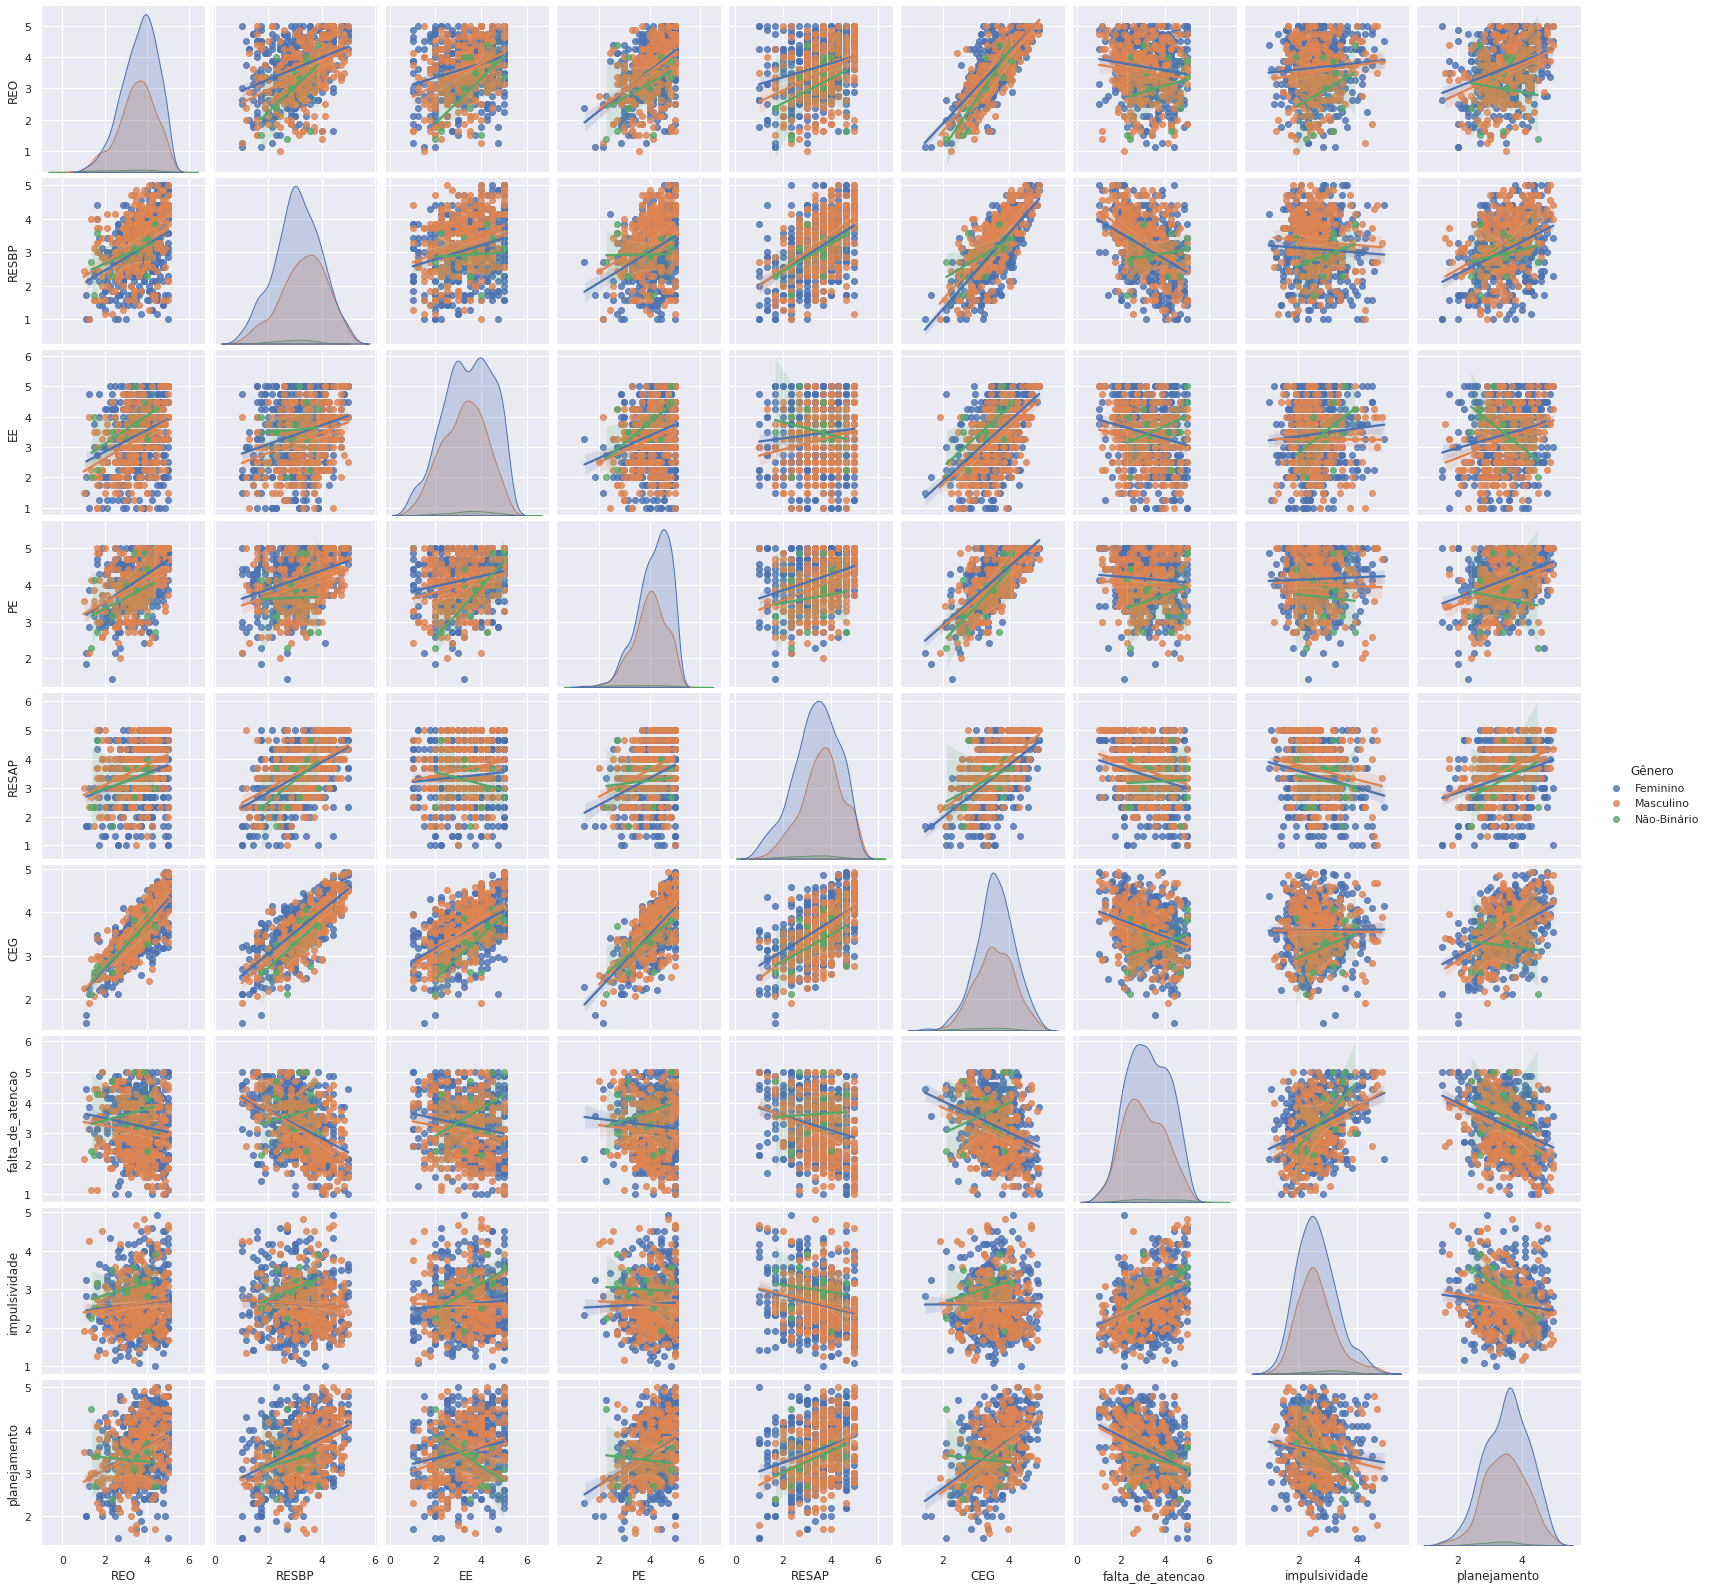

In [63]:
sns.pairplot(df_analise, kind= "reg", diag_kind= 'kde', hue= "Gênero")